In [123]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
def print_acc(acc, name):
    print(f"Overall accuracy of model {name} is {acc*100:.4f}%")

In [157]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          font_scale=2,
                          title_fontsize = 20,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''

    print(f"Making {title} CFM")
    sns.set(font_scale=font_scale)
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    plt.yticks(rotation=45, ha='right', rotation_mode='anchor')

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title, fontsize=title_fontsize)

    plt.show()

In [61]:
# Opening FINAL experiemnt CFMs
final_exp_path = '/data/ForestSegmentationOutput/experiemnts/FIXED_BLOCK_run_FINAL_28-12-2023_19h23min'
f = open(f'{final_exp_path}/experiment_data.json')
 
# returns JSON object as 
# a dictionary
EXPERIEMNT_PARAMS = json.load(f)
f.close()

In [62]:
EXPERIEMNT_PARAMS.keys()

dict_keys(['NAME', 'BASE_OUTPUT', 'MODELS', 'EXPERIMENT_PATH'])

In [63]:
model_names = [model['NAME'] for model in EXPERIEMNT_PARAMS['MODELS']]

In [64]:
model_names

['unet_id=8EvEL_width=512_num_layers=5_lr=0.00085_epochs=400',
 'unet_id=3nphM_width=32_num_layers=2_lr=0.00085_epochs=400']

In [65]:
#pd.read_csv(f'{final_exp_path}/{name}_train_polygons_test_CFM_data.csv')

NameError: name 'name' is not defined

In [66]:
highres_cfm = pd.read_csv(f'{final_exp_path}/unet_id=8EvEL_width=512_num_layers=5_lr=0.00085_epochs=400_train_polygons_test_CFM_data.csv', index_col=0)
lowres_cfm = pd.read_csv(f'{final_exp_path}/unet_id=3nphM_width=32_num_layers=2_lr=0.00085_epochs=400_train_polygons_test_CFM_data.csv', index_col=0)

In [67]:
print_acc(acc=np.trace(highres_cfm.values) / np.sum(highres_cfm.values),
          name="high res UNET")

print_acc(acc=np.trace(lowres_cfm.values) / np.sum(lowres_cfm.values),
          name="low res UNET")

Overall accuracy of model high res UNET is 28.7978%
Overall accuracy of model low res UNET is 28.9653%


In [68]:
highres_cfm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,38341,223249,0,103046,0,0,635800,19903,41415,15428,3890,0
1,0,130477,158617,0,63574,0,0,769530,610,43538,10046,1089,0
2,0,53851,541825,0,159756,0,0,460061,5241,10629,15407,745,0
3,0,1080,222050,0,43947,0,0,20751,0,35,1,0,0
4,0,30604,419610,0,329211,0,0,728708,149325,46609,52828,1361,0
5,0,9651,228503,0,85537,0,0,153278,5,18077,9765,535,0
6,0,9351,264871,0,118392,0,0,79575,117,3146,8499,669,0
7,0,116218,276182,0,153983,0,0,1877222,211193,168980,57791,966,0
8,0,10300,1665,0,2597,0,0,339008,498142,125589,79639,4864,0
9,0,121813,55428,0,20236,0,0,343940,11587,186986,81035,2498,0


## Without classes 12 and 0

In [86]:
hcfm = highres_cfm.drop(columns=['0', '12']) \
                  .drop([0, 12])

lcfm = lowres_cfm.drop(columns=['0', '12']) \
                 .drop([0, 12])

hcfm.columns = hcfm.columns.astype(int)
lcfm.columns = lcfm.columns.astype(int)

In [87]:
hcfm

,1,2,3,4,5,6,7,8,9,10,11
1,130477,158617,0,63574,0,0,769530,610,43538,10046,1089
2,53851,541825,0,159756,0,0,460061,5241,10629,15407,745
3,1080,222050,0,43947,0,0,20751,0,35,1,0
4,30604,419610,0,329211,0,0,728708,149325,46609,52828,1361
5,9651,228503,0,85537,0,0,153278,5,18077,9765,535
6,9351,264871,0,118392,0,0,79575,117,3146,8499,669
7,116218,276182,0,153983,0,0,1877222,211193,168980,57791,966
8,10300,1665,0,2597,0,0,339008,498142,125589,79639,4864
9,121813,55428,0,20236,0,0,343940,11587,186986,81035,2498
10,7898,12362,0,10643,0,0,109393,148005,47795,47768,2917


In [72]:
print_acc(acc=np.trace(hcfm.values) / np.sum(hcfm.values),
          name="high res UNET with no 0 or 12 class")

print_acc(acc=np.trace(lcfm.values) / np.sum(lcfm.values),
          name="low res UNET with no 0 or 12 class")

Overall accuracy of model high res UNET with no 0 or 12 class is 31.8945%
Overall accuracy of model low res UNET with no 0 or 12 class is 32.0516%


In [105]:
def calc_stats_for_cfm(cfm, classes):
    iou = []
    dice_coeff = []
    recall = []
    precision = []
    for c in classes:
        iou.append(cfm.loc[c].loc[c] / (cfm.loc[c].sum() + cfm[c].sum() - cfm.loc[c].loc[c]))
        dice_coeff.append((2*cfm.loc[c].loc[c]) / (cfm.loc[c].sum() + cfm[c].sum()))
        recall.append(cfm.loc[c].loc[c] / cfm.loc[c].sum())
        precision.append(cfm.loc[c].loc[c] / cfm[c].sum())
    df = pd.DataFrame({
        'class': classes,
        'IoU': iou,
        'dice': dice_coeff,
        'recall': recall,
        'precision': precision
    })
    return df
    
    

In [106]:
classes = list(np.arange(1,12))
classes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [156]:
hres_res = calc_stats_for_cfm(hcfm, classes)
hres_res.style.format('{:.2f}', subset=['IoU', 'dice', 'recall', 'precision']).set_caption("High-resolution model performance")

<ipython-input-105-4b629fe8bf40>:10: RuntimeWarning: invalid value encountered in long_scalars
  precision.append(cfm.loc[c].loc[c] / cfm[c].sum())


,class,IoU,dice,recall,precision
0,1,0.08,0.16,0.11,0.27
1,2,0.19,0.32,0.43,0.25
2,3,0.00,0.00,0.00,nan
3,4,0.14,0.24,0.19,0.33
4,5,0.00,0.00,0.00,nan
5,6,0.00,0.00,0.00,nan
6,7,0.32,0.48,0.66,0.38
7,8,0.31,0.47,0.47,0.47
8,9,0.10,0.18,0.23,0.15
9,10,0.06,0.11,0.12,0.10


In [154]:
lres_res = calc_stats_for_cfm(lcfm, classes)
lres_res.style.format('{:.2f}', subset=['IoU', 'dice', 'recall', 'precision']).set_caption("Low-resolution model performance")

<ipython-input-105-4b629fe8bf40>:10: RuntimeWarning: invalid value encountered in long_scalars
  precision.append(cfm.loc[c].loc[c] / cfm[c].sum())


,class,IoU,dice,recall,precision
0,1,0.11,0.20,0.17,0.26
1,2,0.25,0.40,0.61,0.30
2,3,0.00,0.00,0.00,nan
3,4,0.19,0.32,0.34,0.31
4,5,0.00,0.00,0.00,nan
5,6,0.00,0.00,0.00,nan
6,7,0.25,0.40,0.41,0.39
7,8,0.37,0.54,0.58,0.50
8,9,0.15,0.26,0.33,0.21
9,10,0.04,0.07,0.10,0.06


Making Low-resolution model CFM on test set CFM


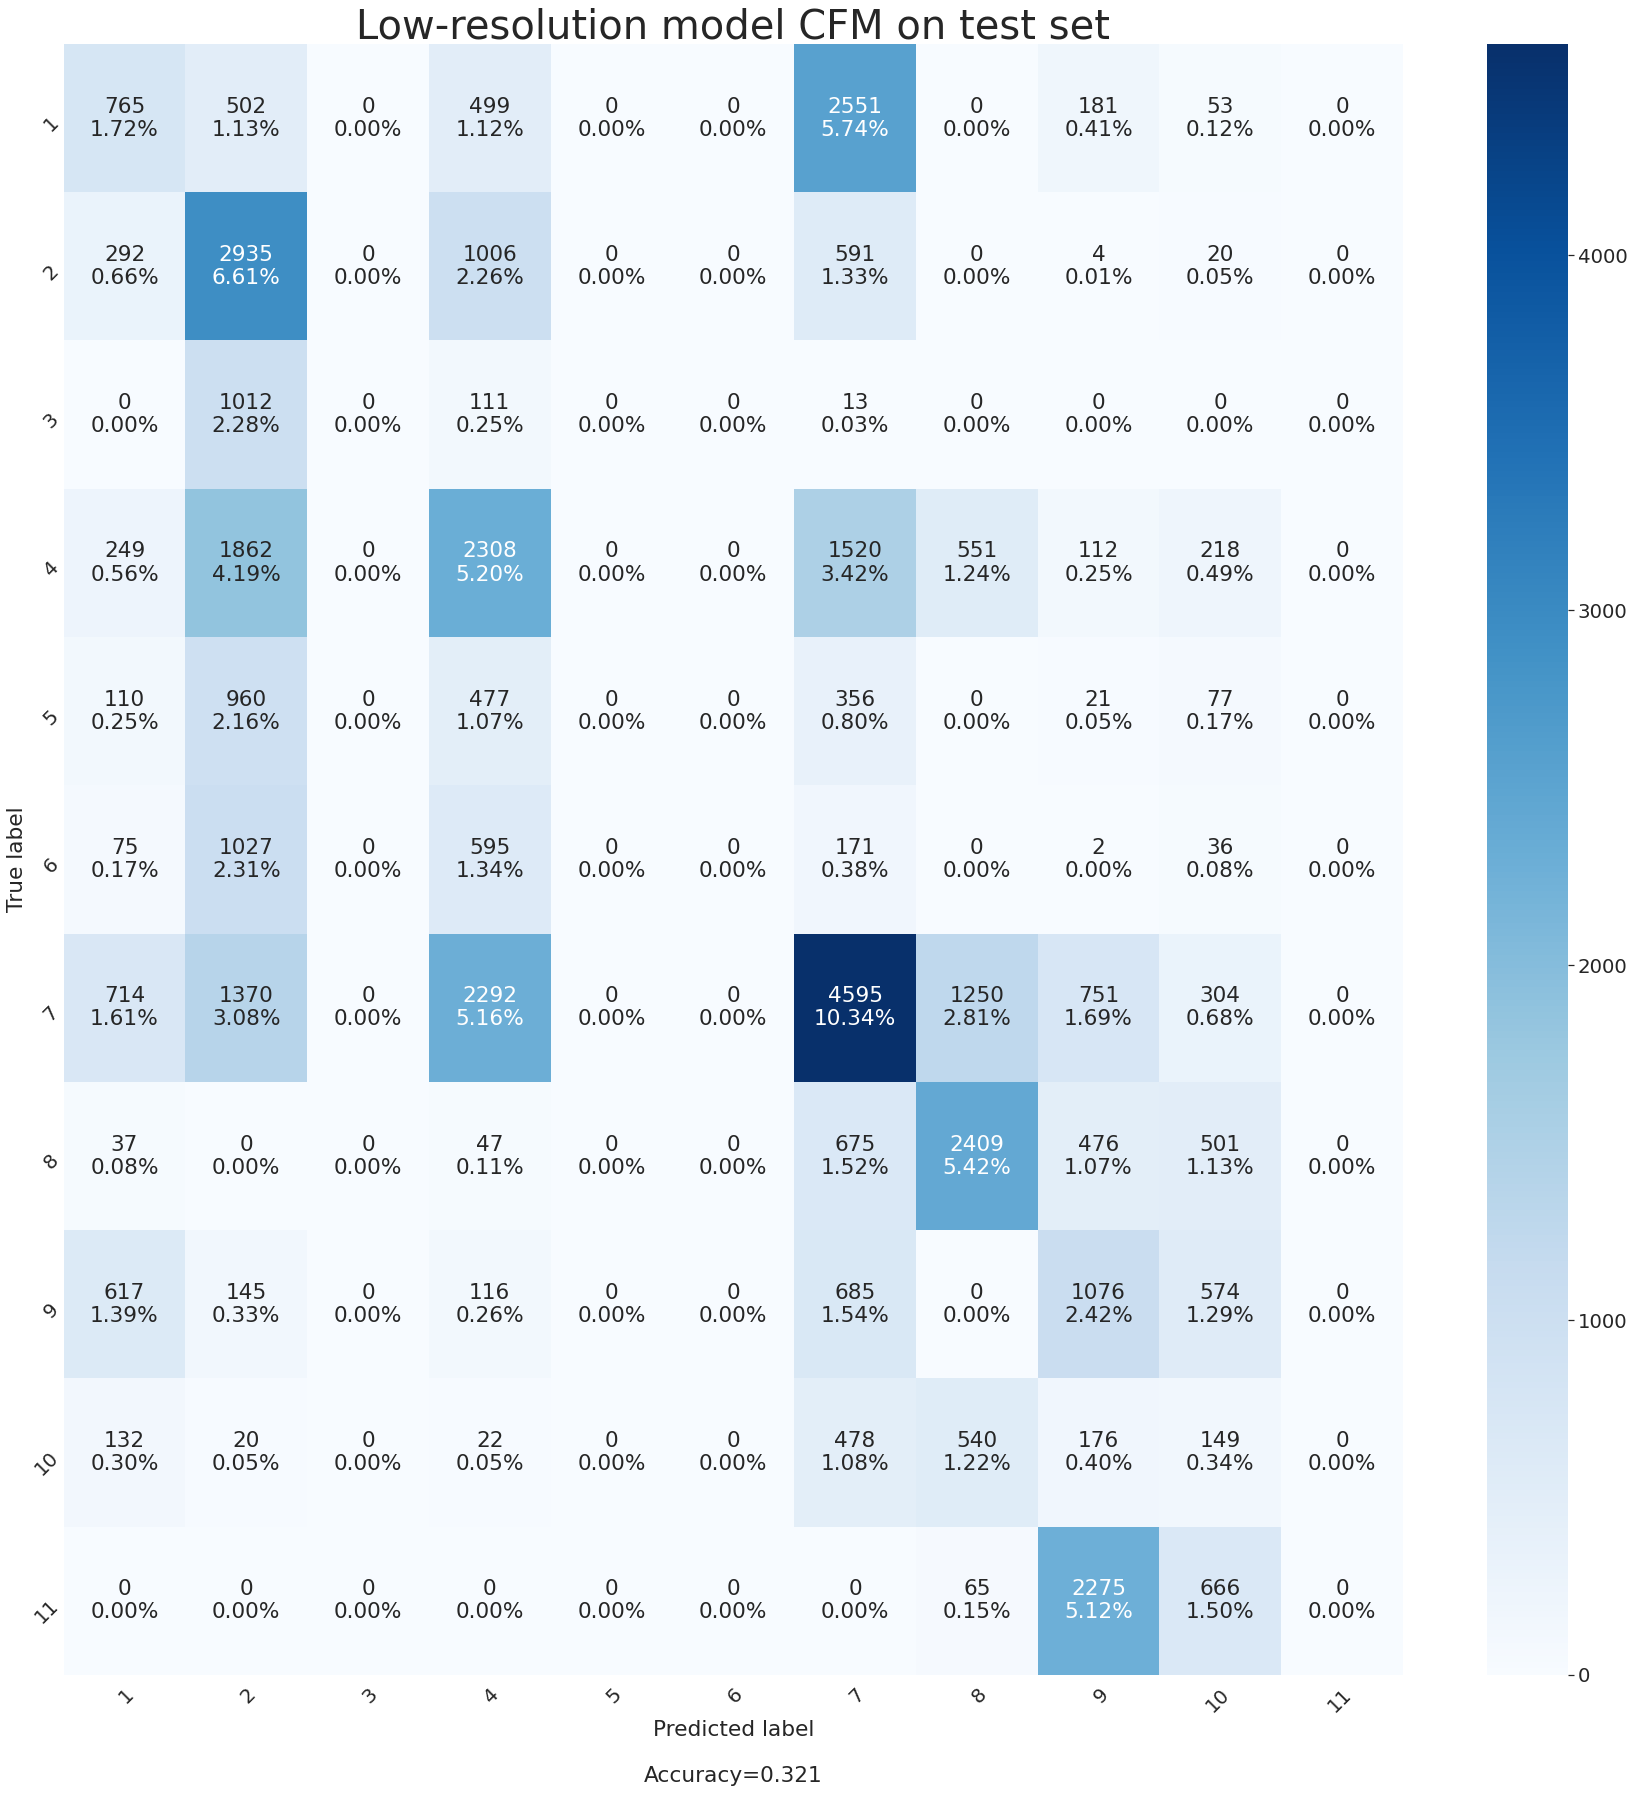

In [160]:
make_confusion_matrix(cf=lcfm.values,
                          group_names=None,
                          categories=classes,
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(30,30),
                          font_scale=1.8,
                          title_fontsize=40,
                          cmap='Blues',
                          title='Low-resolution model CFM on test set'
)

Making High-resolution model CFM on test set CFM


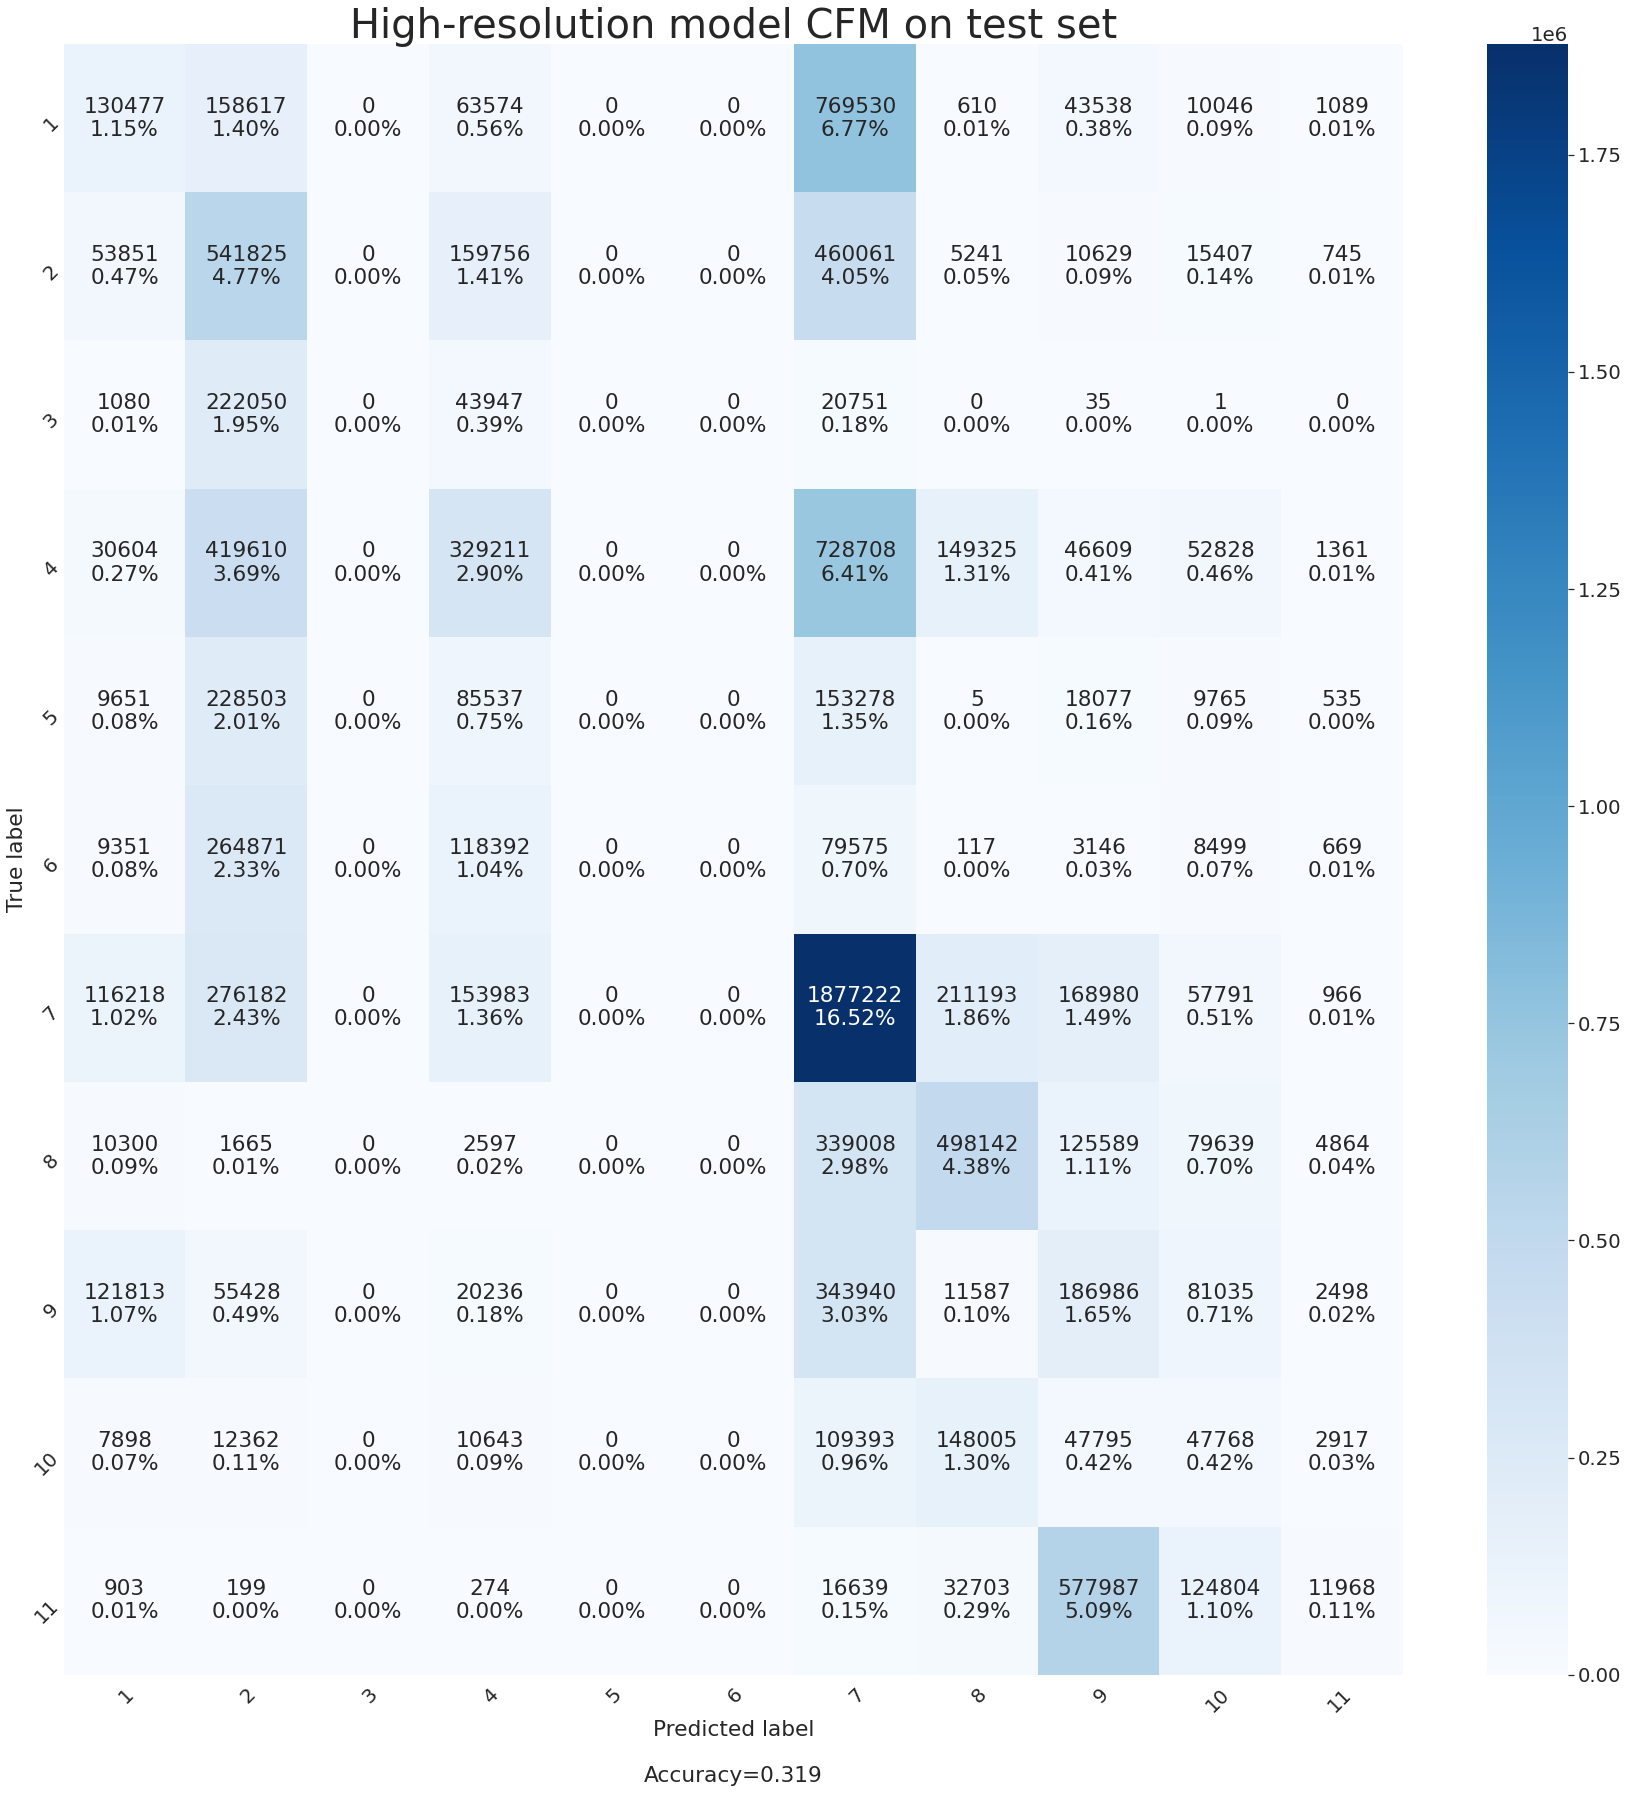

In [159]:
make_confusion_matrix(cf=hcfm.values,
                          group_names=None,
                          categories=classes,
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(30,30),
                          font_scale=1.8,
                          title_fontsize=40,
                          cmap='Blues',
                          title='High-resolution model CFM on test set'
)